In [1]:
import mplfinance as mpf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [2]:
API_key = 'MCO3JQL81ATB1YZ0'
time = TimeSeries(key = API_key,output_format='pandas')

In [3]:
def VWAPWAP(ticker,cash):
    data = time.get_intraday(symbol=ticker,interval='1min',outputsize='full')
    df = data[0]
    df = df.rename(columns={"1. open":"Open","2. high":"High","3. low":"Low","4. close":"Close","5. volume":"Volume"})
    result = [group[1] for group in df.groupby(df.index.day)]
    VWAP_cross_returns = 0
    for df_vwap in result:
        df_vwap = df_vwap.loc[(df_vwap.index.hour >= 9)]
        df_vwap = df_vwap.loc[(df_vwap.index.hour <= 15)]
        df_vwap = df_vwap.resample('5T').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})
        df_vwap['VWAP'] = (((df_vwap['High']+df_vwap['Low']+df_vwap['Close'])*df_vwap['Volume']/3).cumsum())/df_vwap['Volume'].cumsum()
        df_vwap['TWAP'] = df_vwap['High']
        df_vwap = df_vwap.dropna()
        vwap = mpf.make_addplot(df_vwap['VWAP'])
        mpf.plot(df_vwap,addplot=vwap,type='candle',style='yahoo',volume=True,title=f"{df_vwap.index.date[0]} {ticker} VWAP")
        VWAP_cross_returns += VWAP_cross_strategy(ticker,df_vwap,cash)
    print(VWAP_cross_returns)
    return 

In [4]:
# Buys when price goes above VWAP and shorts when it goes below 
def VWAP_cross_strategy(ticker,df_vwap,cash): 
    shares = 0
    cash0 = cash
    print(f'{df_vwap.index.date[0]}')
    for index,row in df_vwap.iterrows():
        if ((row['VWAP'] < row['Close']) and (row['VWAP'] < row['Open']) and cash):
            shares = cash/row['Close']
            print(f"{index.time()}: Buy {shares:.3f} {ticker} shares at {row['Close']} per share")
            cash = 0
        if ((row['VWAP'] > row['Close']) and (row['VWAP'] < row['Open']) and not cash):
            cash = shares*row['Close']
            print(f"{index.time()}: Sell {shares:.3f} {ticker} shares at {row['Close']} per share")
            shares = 0
        price = row['Close']
    cash = cash + shares*price
    print(f'Cash: {cash}')
    returns = (cash - cash0)/cash0
    print(f'Return: {returns*100:.2f}%')
    return returns

In [5]:
def VWAP_mean_reversion_strategy(ticker,df_vwap,cash):
    shares = 0
    cash0 = cash
    print(f'{df_vwap.index.date[0]}')
    return

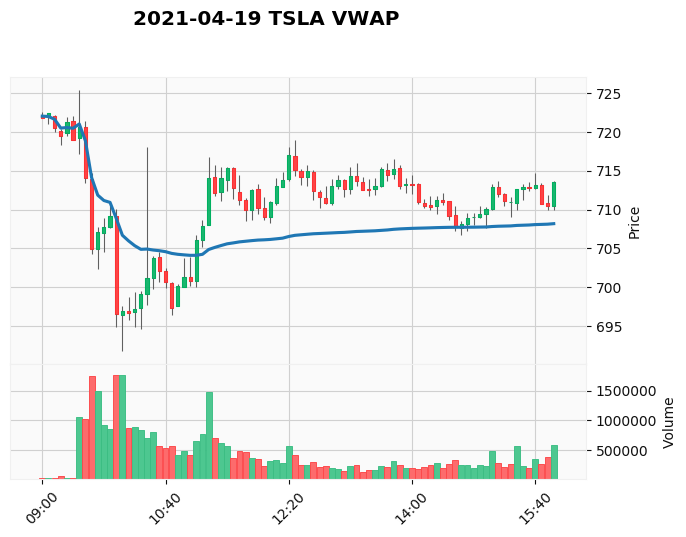

2021-04-19
09:05:00: Buy 1.384 TSLA shares at 722.37 per share
09:10:00: Sell 1.384 TSLA shares at 720.48 per share
11:10:00: Buy 1.409 TSLA shares at 707.91 per share
14:35:00: Sell 1.409 TSLA shares at 707.7175 per share
14:45:00: Buy 1.406 TSLA shares at 708.95 per share
Cash: 1003.4836768033622
Return: 0.35%


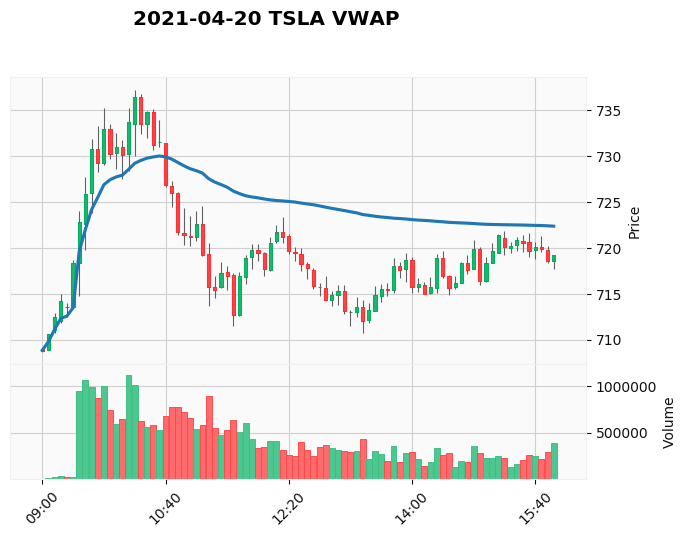

2021-04-20
09:20:00: Buy 1.401 TSLA shares at 713.55 per share
10:40:00: Sell 1.401 TSLA shares at 726.91 per share
Cash: 1018.7232849835331
Return: 1.87%


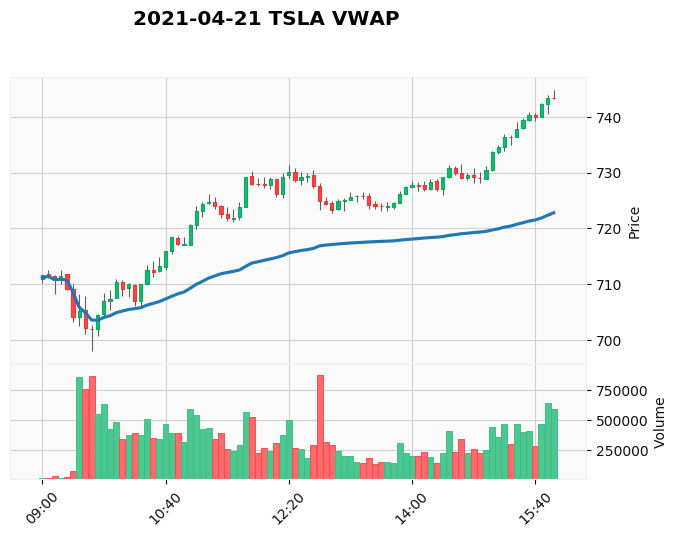

2021-04-21
09:05:00: Buy 1.405 TSLA shares at 711.5 per share
09:20:00: Sell 1.405 TSLA shares at 709.1326 per share
09:50:00: Buy 1.410 TSLA shares at 706.9901 per share
Cash: 1047.8461069951043
Return: 4.78%


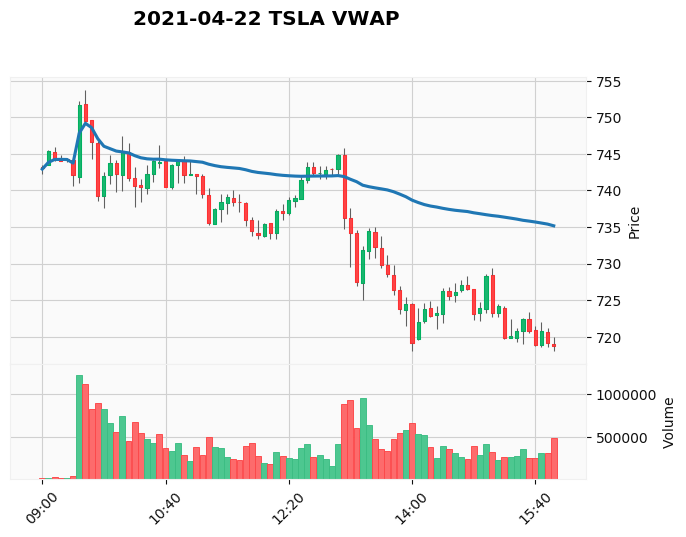

2021-04-22
09:00:00: Buy 1.346 TSLA shares at 743.05 per share
09:20:00: Sell 1.346 TSLA shares at 744.1 per share
09:35:00: Buy 1.336 TSLA shares at 749.5301 per share
09:40:00: Sell 1.336 TSLA shares at 746.56 per share
12:40:00: Buy 1.343 TSLA shares at 742.4316 per share
13:05:00: Sell 1.343 TSLA shares at 736.18 per share
Cash: 989.0459553204548
Return: -1.10%


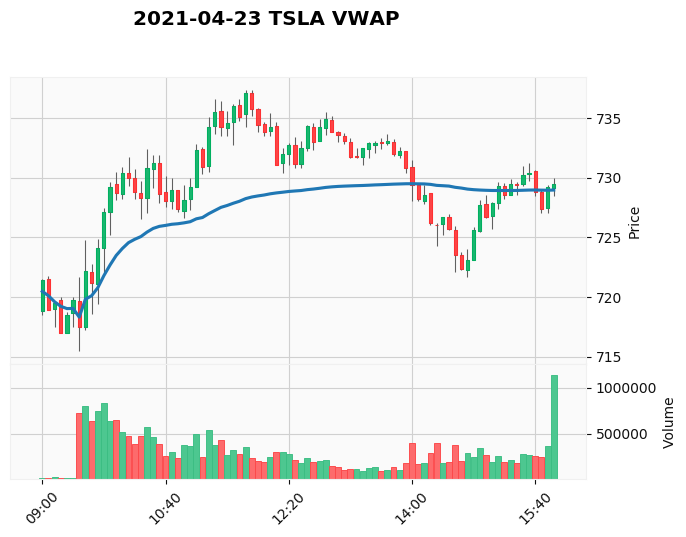

2021-04-23
09:40:00: Buy 1.387 TSLA shares at 721.14 per share
14:00:00: Sell 1.387 TSLA shares at 729.3492 per share
15:25:00: Buy 1.387 TSLA shares at 729.39 per share
15:40:00: Sell 1.387 TSLA shares at 728.82 per share
15:55:00: Buy 1.385 TSLA shares at 729.46 per share
Cash: 1010.5932716035406
Return: 1.06%


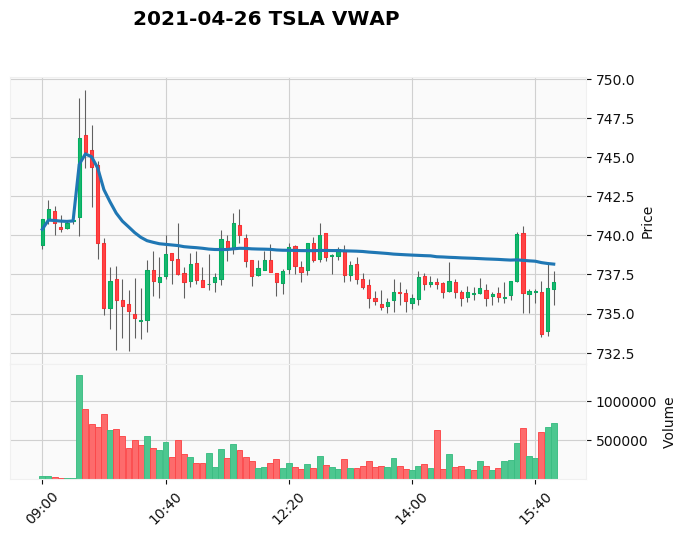

2021-04-26
09:05:00: Buy 1.348 TSLA shares at 741.69 per share
09:10:00: Sell 1.348 TSLA shares at 740.8 per share
09:35:00: Buy 1.340 TSLA shares at 745.3469 per share
09:40:00: Sell 1.340 TSLA shares at 744.39 per share
11:30:00: Buy 1.350 TSLA shares at 739.1327 per share
11:45:00: Sell 1.350 TSLA shares at 738.34 per share
Cash: 996.4479355377981
Return: -0.36%


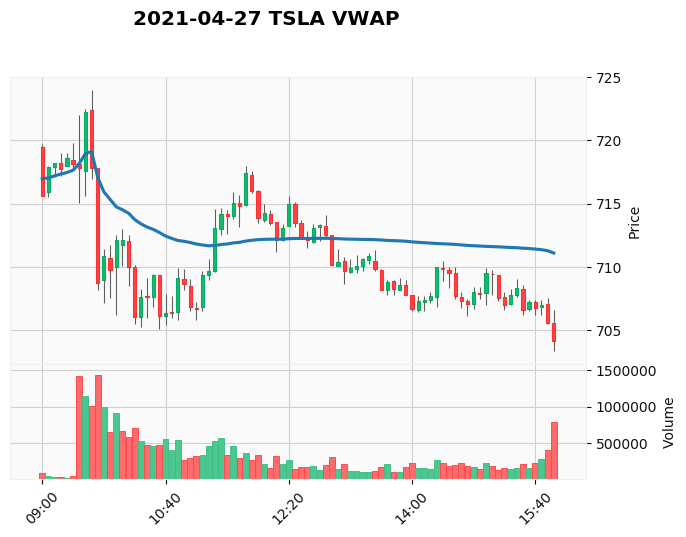

2021-04-27
09:10:00: Buy 1.392 TSLA shares at 718.22 per share
09:40:00: Sell 1.392 TSLA shares at 717.8199 per share
11:25:00: Buy 1.399 TSLA shares at 714.2101 per share
12:10:00: Sell 1.399 TSLA shares at 712.11 per share
12:20:00: Buy 1.394 TSLA shares at 714.9346 per share
12:35:00: Sell 1.394 TSLA shares at 712.0981 per share
12:45:00: Buy 1.391 TSLA shares at 713.3 per share
12:55:00: Sell 1.391 TSLA shares at 710.18 per share
Cash: 988.2090375163755
Return: -1.18%


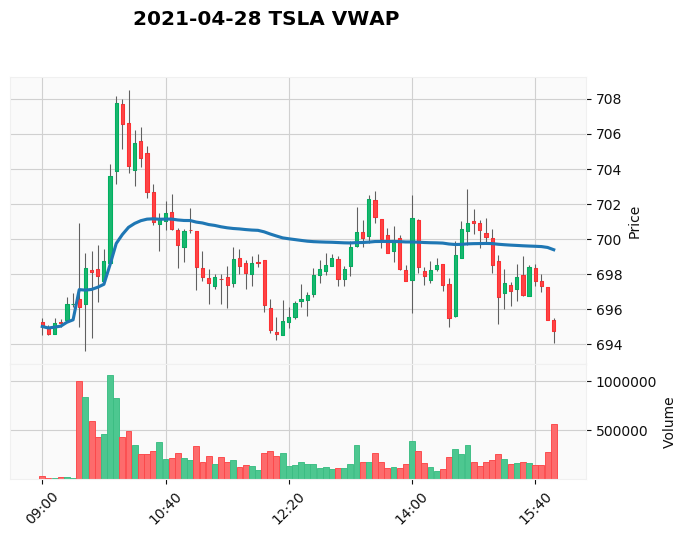

2021-04-28
09:00:00: Buy 1.439 TSLA shares at 695.01 per share
09:05:00: Sell 1.439 TSLA shares at 694.6 per share
09:15:00: Buy 1.438 TSLA shares at 695.2 per share
10:30:00: Sell 1.438 TSLA shares at 700.945 per share
13:20:00: Buy 1.439 TSLA shares at 700.034 per share
13:40:00: Sell 1.439 TSLA shares at 699.1961 per share
14:45:00: Buy 1.436 TSLA shares at 700.9164 per share
15:05:00: Sell 1.436 TSLA shares at 698.5301 per share
Cash: 1003.0363470319933
Return: 0.30%


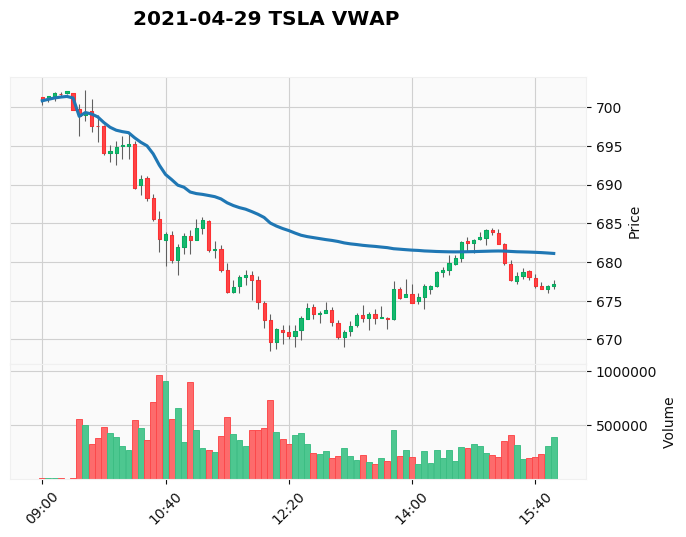

2021-04-29
09:00:00: Buy 1.427 TSLA shares at 701.0 per share
09:25:00: Sell 1.427 TSLA shares at 699.58 per share
14:45:00: Buy 1.462 TSLA shares at 682.4401 per share
15:15:00: Sell 1.462 TSLA shares at 679.8456 per share
Cash: 994.1802247468956
Return: -0.58%


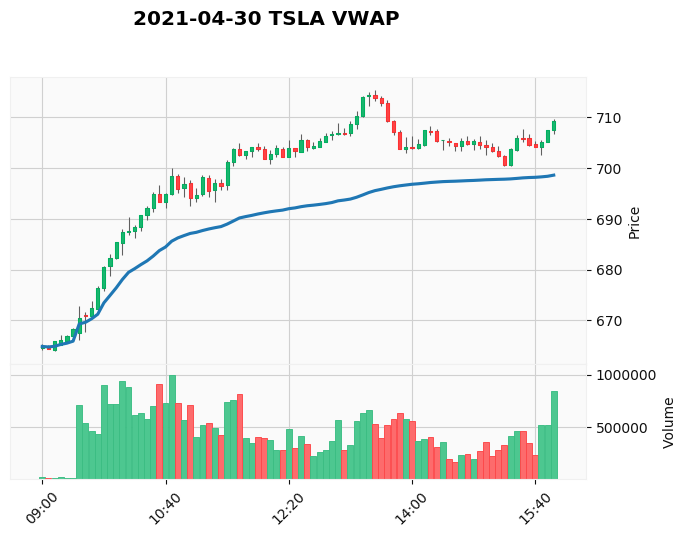

2021-04-30
09:20:00: Buy 1.499 TSLA shares at 666.98 per share
Cash: 1063.5251431827041
Return: 6.35%
0.11509098372176162


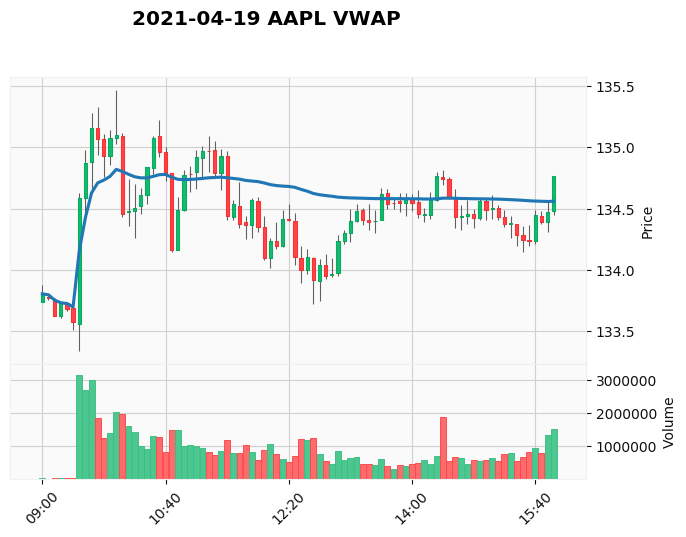

2021-04-19
09:35:00: Buy 7.415 AAPL shares at 134.87 per share
10:05:00: Sell 7.415 AAPL shares at 134.4601 per share
10:30:00: Buy 7.381 AAPL shares at 135.0801 per share
10:45:00: Sell 7.381 AAPL shares at 134.16 per share
11:00:00: Buy 7.347 AAPL shares at 134.78 per share
11:30:00: Sell 7.347 AAPL shares at 134.44 per share
14:25:00: Buy 7.330 AAPL shares at 134.74 per share
14:35:00: Sell 7.330 AAPL shares at 134.43 per share
Cash: 985.3997684980583
Return: -1.46%


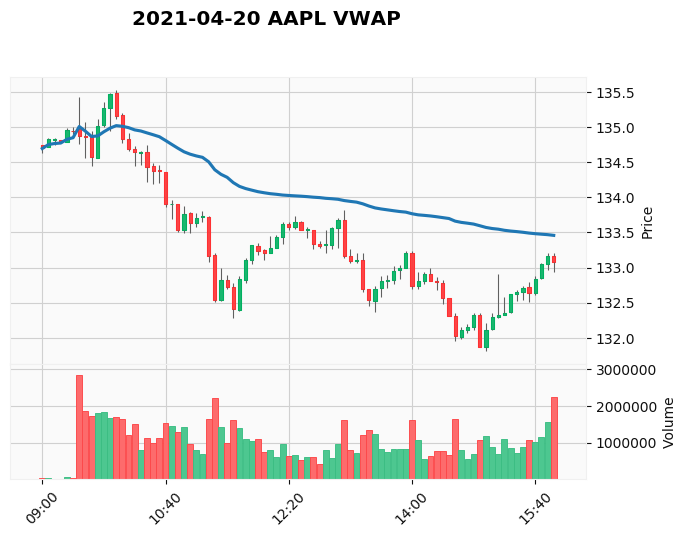

2021-04-20
09:00:00: Buy 7.424 AAPL shares at 134.7 per share
10:05:00: Sell 7.424 AAPL shares at 134.825 per share
Cash: 1000.9279881217522
Return: 0.09%


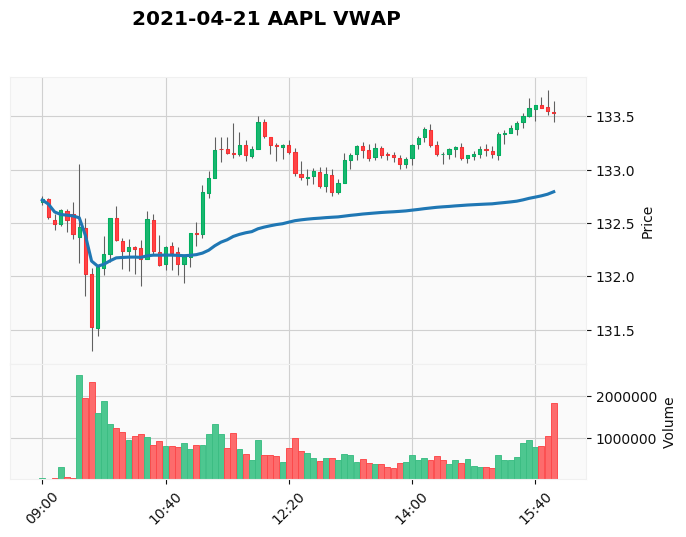

2021-04-21
09:55:00: Buy 7.545 AAPL shares at 132.545 per share
10:20:00: Sell 7.545 AAPL shares at 132.1653 per share
10:30:00: Buy 7.540 AAPL shares at 132.2399 per share
10:35:00: Sell 7.540 AAPL shares at 132.11 per share
10:45:00: Buy 7.534 AAPL shares at 132.22 per share
10:50:00: Sell 7.534 AAPL shares at 132.12 per share
11:05:00: Buy 7.518 AAPL shares at 132.4 per share
Cash: 1003.9355077742404
Return: 0.39%


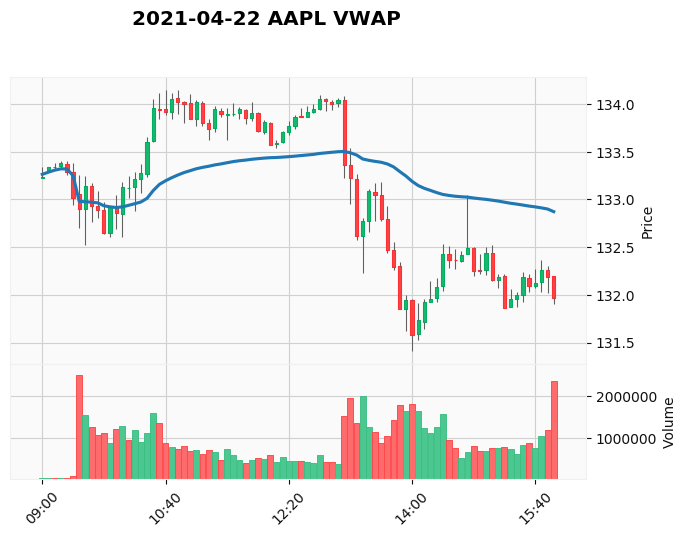

2021-04-22
09:05:00: Buy 7.500 AAPL shares at 133.34 per share
09:20:00: Sell 7.500 AAPL shares at 133.29 per share
10:10:00: Buy 7.509 AAPL shares at 133.1213 per share
13:05:00: Sell 7.509 AAPL shares at 133.36 per share
Cash: 1001.4174478492548
Return: 0.14%


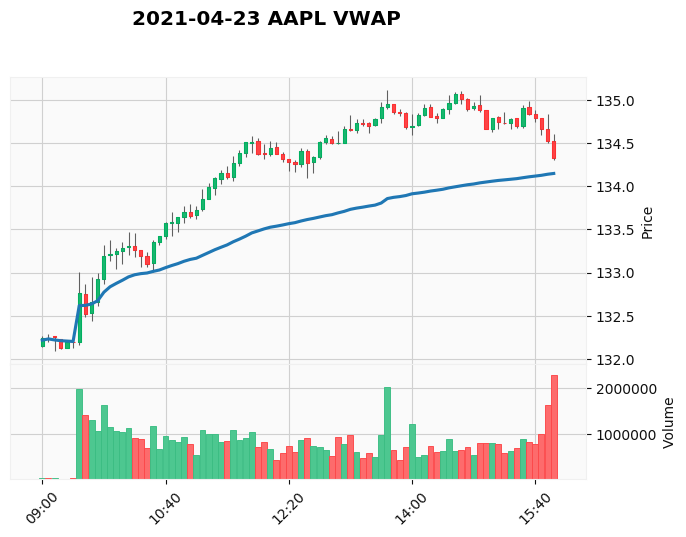

2021-04-23
09:05:00: Buy 7.562 AAPL shares at 132.24 per share
09:15:00: Sell 7.562 AAPL shares at 132.13 per share
09:50:00: Buy 7.502 AAPL shares at 133.195 per share
Cash: 1007.6944342005285
Return: 0.77%


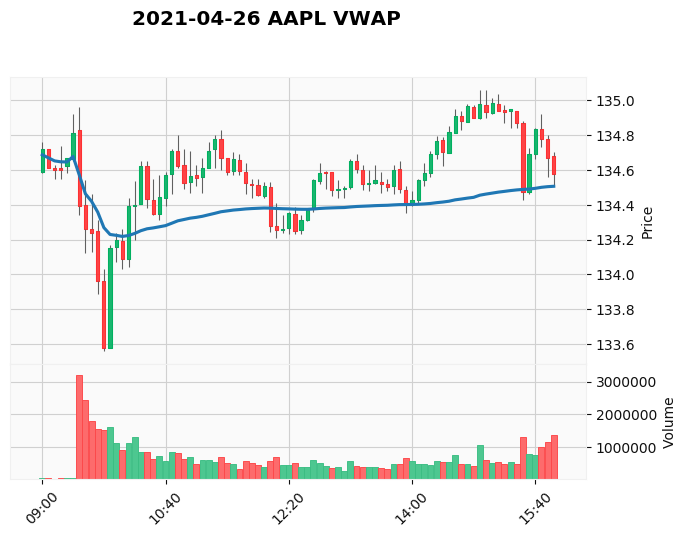

2021-04-26
10:15:00: Buy 7.440 AAPL shares at 134.4 per share
12:05:00: Sell 7.440 AAPL shares at 134.28 per share
12:40:00: Buy 7.426 AAPL shares at 134.54 per share
15:30:00: Sell 7.426 AAPL shares at 134.475 per share
15:40:00: Buy 7.406 AAPL shares at 134.835 per share
Cash: 996.6988162668646
Return: -0.33%


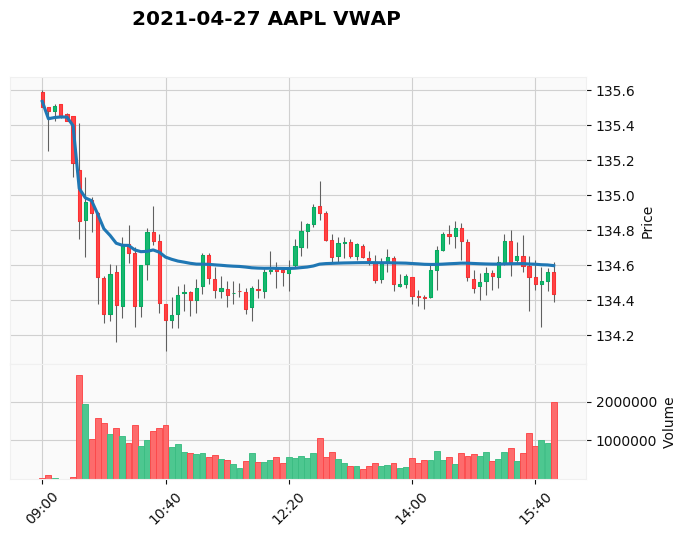

2021-04-27
09:05:00: Buy 7.381 AAPL shares at 135.48 per share
09:20:00: Sell 7.381 AAPL shares at 135.42 per share
10:30:00: Buy 7.418 AAPL shares at 134.74 per share
10:35:00: Sell 7.418 AAPL shares at 134.3821 per share
12:25:00: Buy 7.400 AAPL shares at 134.7083 per share
13:30:00: Sell 7.400 AAPL shares at 134.518 per share
13:40:00: Buy 7.393 AAPL shares at 134.649 per share
13:45:00: Sell 7.393 AAPL shares at 134.49 per share
14:25:00: Buy 7.378 AAPL shares at 134.775 per share
14:45:00: Sell 7.378 AAPL shares at 134.53 per share
15:15:00: Buy 7.366 AAPL shares at 134.735 per share
15:30:00: Sell 7.366 AAPL shares at 134.5976 per share
Cash: 991.4985890749947
Return: -0.85%


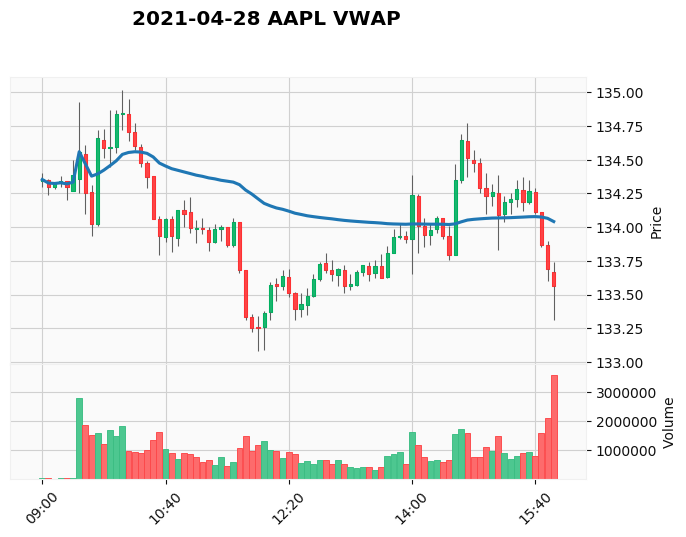

2021-04-28
09:15:00: Buy 7.444 AAPL shares at 134.34 per share
09:20:00: Sell 7.444 AAPL shares at 134.2999 per share
09:50:00: Buy 7.428 AAPL shares at 134.585 per share
10:20:00: Sell 7.428 AAPL shares at 134.4782 per share
14:40:00: Buy 7.419 AAPL shares at 134.645 per share
15:45:00: Sell 7.419 AAPL shares at 133.865 per share
Cash: 993.1215035910874
Return: -0.69%


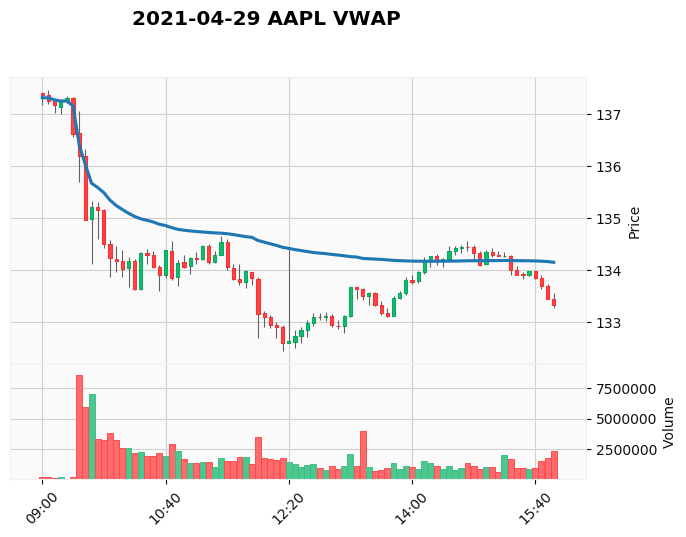

2021-04-29
09:00:00: Buy 7.280 AAPL shares at 137.37 per share
09:05:00: Sell 7.280 AAPL shares at 137.26 per share
14:15:00: Buy 7.441 AAPL shares at 134.275 per share
14:20:00: Sell 7.441 AAPL shares at 134.175 per share
14:30:00: Buy 7.430 AAPL shares at 134.375 per share
14:55:00: Sell 7.430 AAPL shares at 134.1111 per share
15:05:00: Buy 7.420 AAPL shares at 134.295 per share
15:20:00: Sell 7.420 AAPL shares at 134.01 per share
Cash: 994.3794723230674
Return: -0.56%


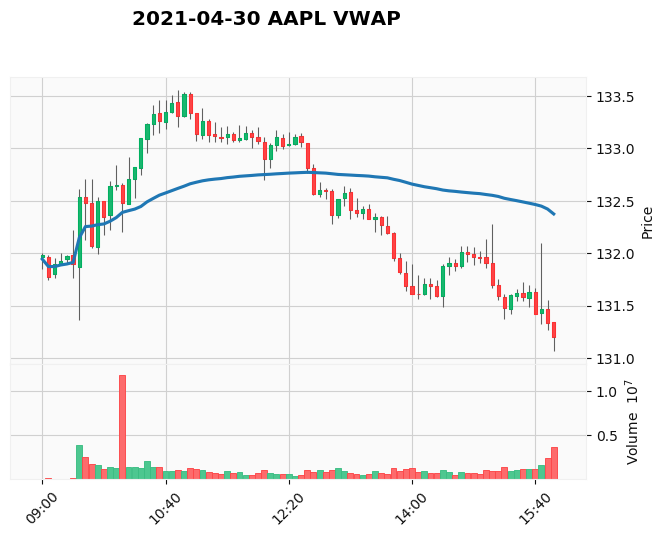

2021-04-30
09:00:00: Buy 7.577 AAPL shares at 131.98 per share
09:05:00: Sell 7.577 AAPL shares at 131.77 per share
09:15:00: Buy 7.568 AAPL shares at 131.93 per share
09:25:00: Sell 7.568 AAPL shares at 131.9 per share
09:35:00: Buy 7.535 AAPL shares at 132.475 per share
09:40:00: Sell 7.535 AAPL shares at 132.0699 per share
09:50:00: Buy 7.519 AAPL shares at 132.35 per share
12:40:00: Sell 7.519 AAPL shares at 132.565 per share
Cash: 996.746011169215
Return: -0.33%
-0.028180461130936918


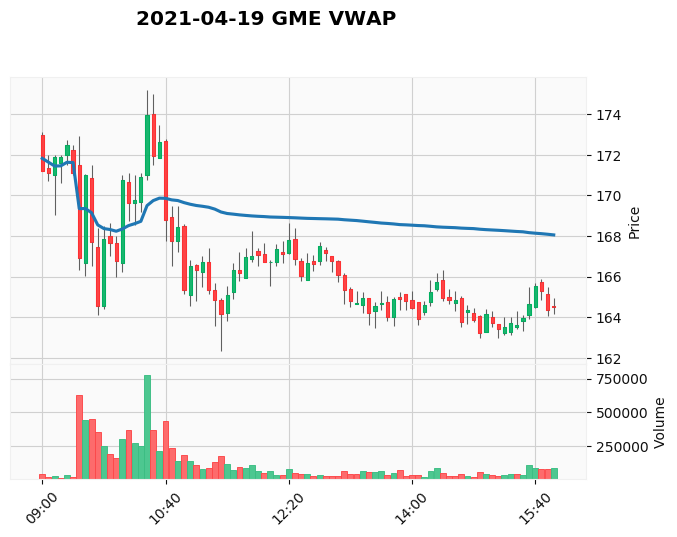

2021-04-19
09:15:00: Buy 5.817 GME shares at 171.9 per share
09:25:00: Sell 5.817 GME shares at 171.11 per share
10:10:00: Buy 5.868 GME shares at 169.625 per share
10:40:00: Sell 5.868 GME shares at 168.8 per share
Cash: 990.5629869124953
Return: -0.94%


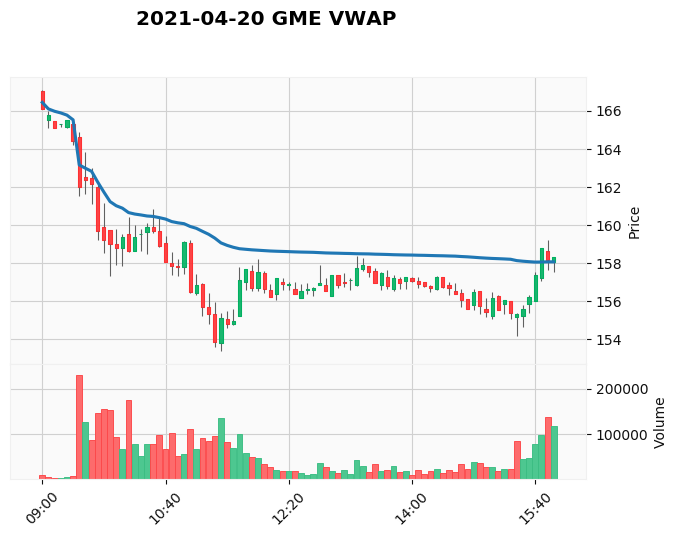

2021-04-20
15:50:00: Buy 6.324 GME shares at 158.13 per share
Cash: 1001.1383039271486
Return: 0.11%


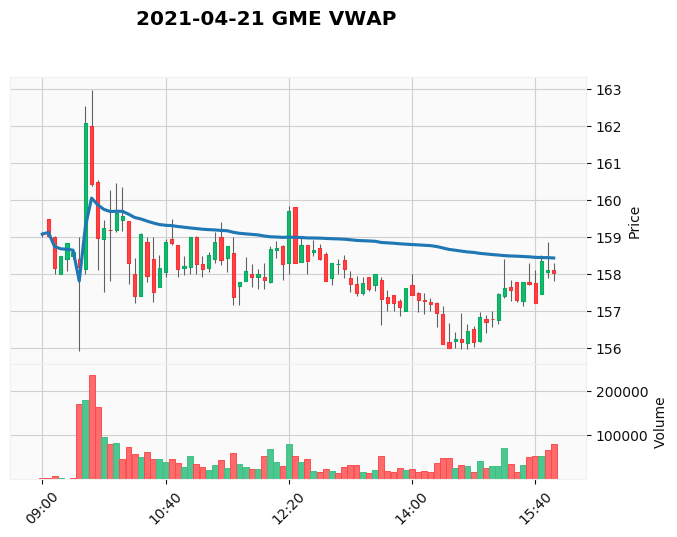

2021-04-21
09:00:00: Buy 6.285 GME shares at 159.1 per share
09:05:00: Sell 6.285 GME shares at 159.04 per share
09:30:00: Buy 6.320 GME shares at 158.18 per share
09:45:00: Sell 6.320 GME shares at 158.98 per share
Cash: 1004.6785007874375
Return: 0.47%


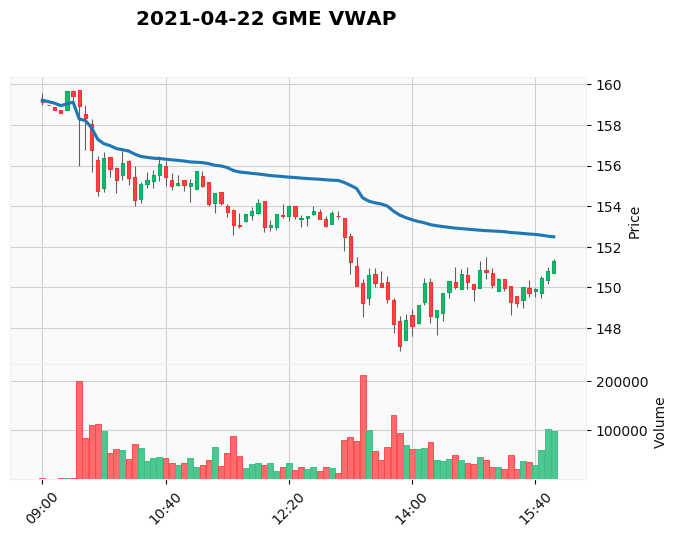

2021-04-22
09:25:00: Buy 6.273 GME shares at 159.42 per share
09:40:00: Sell 6.273 GME shares at 156.75 per share
Cash: 983.2517877305232
Return: -1.67%


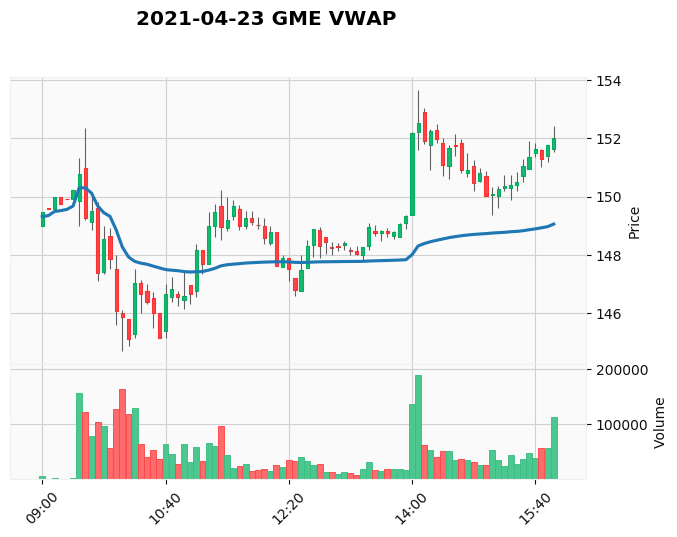

2021-04-23
09:05:00: Buy 6.686 GME shares at 149.57 per share
09:35:00: Sell 6.686 GME shares at 149.28 per share
11:10:00: Buy 6.759 GME shares at 147.67 per share
12:10:00: Sell 6.759 GME shares at 147.62 per share
12:40:00: Buy 6.702 GME shares at 148.87 per share
Cash: 1018.7754193158271
Return: 1.88%


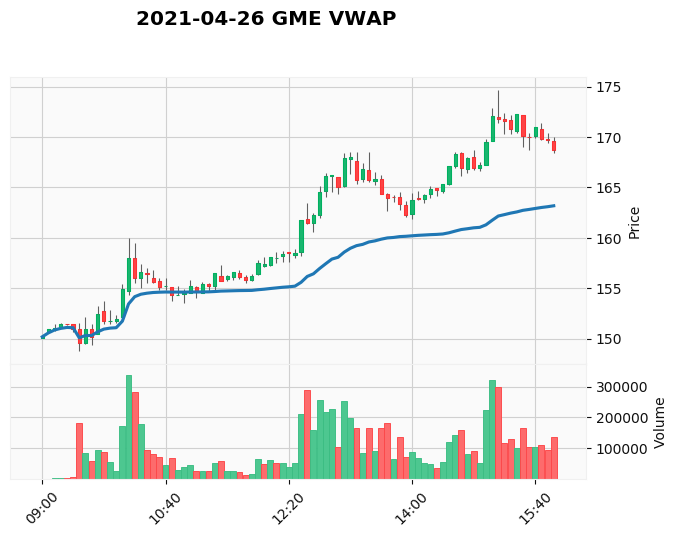

2021-04-26
09:05:00: Buy 6.625 GME shares at 150.95 per share
09:25:00: Sell 6.625 GME shares at 150.95 per share
09:50:00: Buy 6.592 GME shares at 151.7 per share
10:45:00: Sell 6.592 GME shares at 154.35 per share
11:05:00: Buy 6.576 GME shares at 154.7288 per share
Cash: 1109.3407801224253
Return: 10.93%


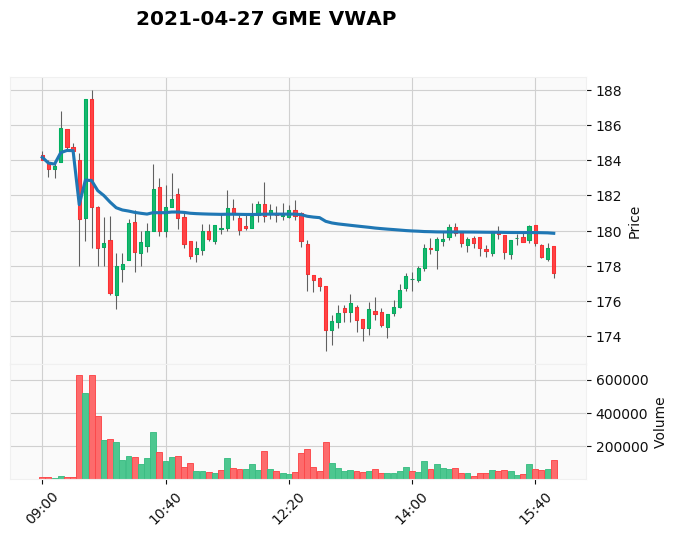

2021-04-27
09:20:00: Buy 5.413 GME shares at 184.7501 per share
09:25:00: Sell 5.413 GME shares at 184.51 per share
10:45:00: Buy 5.494 GME shares at 181.79 per share
10:50:00: Sell 5.494 GME shares at 180.72 per share
12:05:00: Buy 5.481 GME shares at 181.1491 per share
12:10:00: Sell 5.481 GME shares at 180.8821 per share
Cash: 991.3587992815038
Return: -0.86%


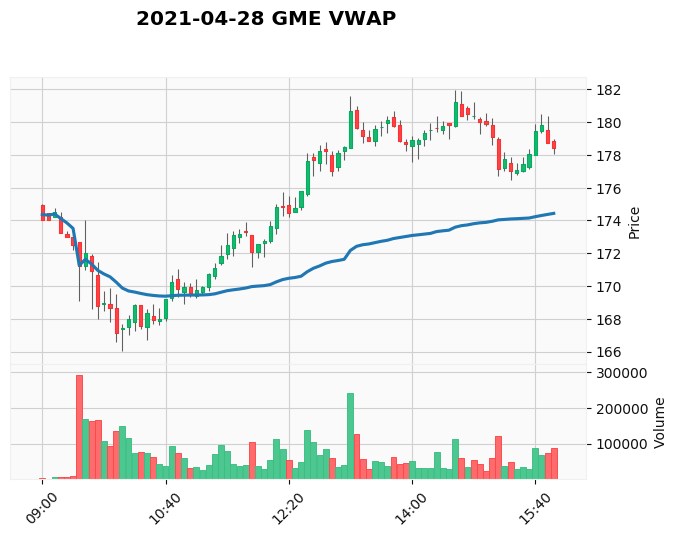

2021-04-28
10:50:00: Buy 5.888 GME shares at 169.84 per share
Cash: 1050.4003768252473
Return: 5.04%


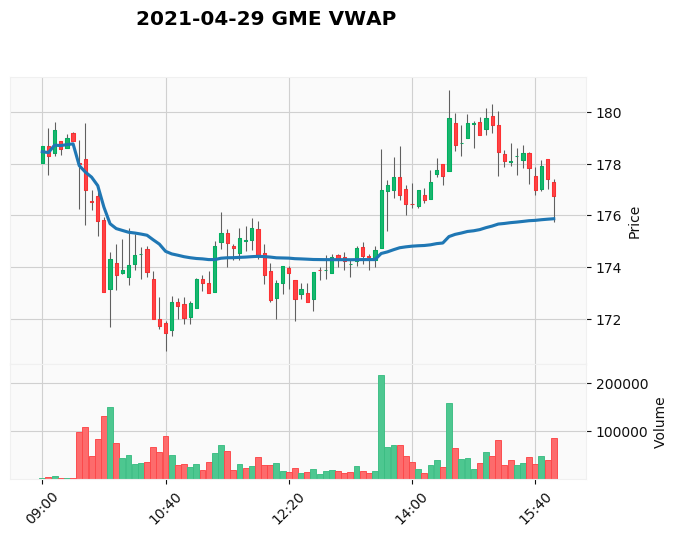

2021-04-29
09:25:00: Buy 5.590 GME shares at 178.88 per share
09:35:00: Sell 5.590 GME shares at 176.97 per share
11:25:00: Buy 5.644 GME shares at 175.3 per share
12:00:00: Sell 5.644 GME shares at 173.7 per share
13:00:00: Buy 5.624 GME shares at 174.315 per share
13:05:00: Sell 5.624 GME shares at 174.235 per share
13:20:00: Buy 5.618 GME shares at 174.41 per share
Cash: 992.9328408760629
Return: -0.71%


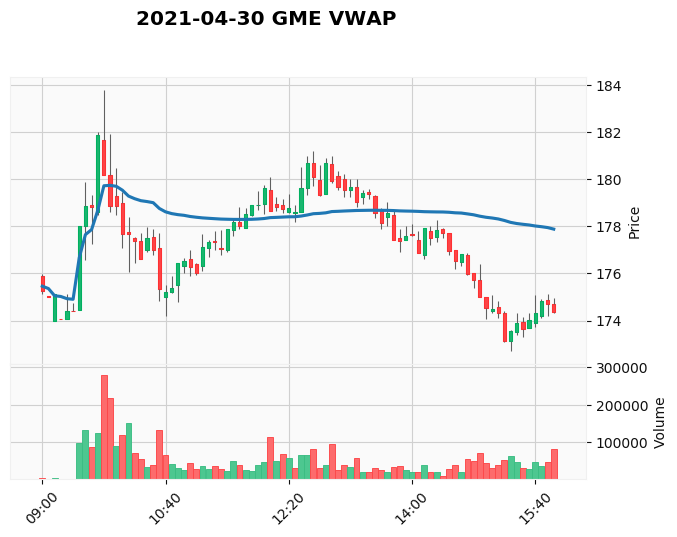

2021-04-30
09:35:00: Buy 5.590 GME shares at 178.875 per share
09:55:00: Sell 5.590 GME shares at 178.85 per share
11:50:00: Buy 5.589 GME shares at 178.8875 per share
13:30:00: Sell 5.589 GME shares at 178.58 per share
Cash: 998.1415203963899
Return: -0.19%
0.14058131617506092


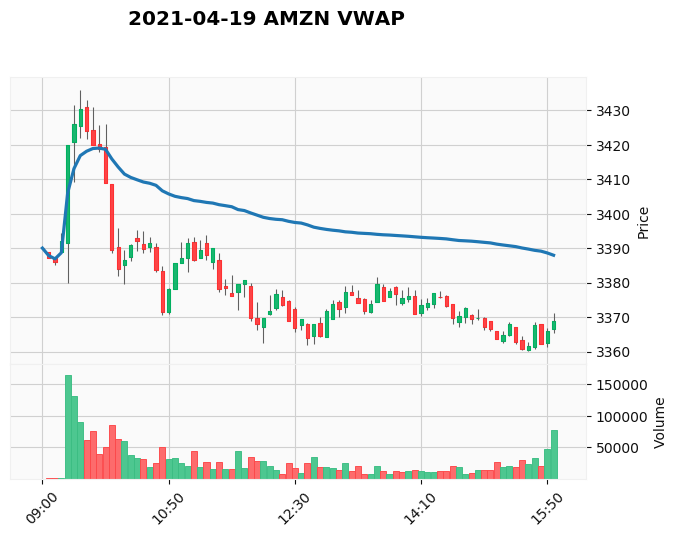

2021-04-19
09:25:00: Buy 0.295 AMZN shares at 3392.0 per share
09:55:00: Sell 0.295 AMZN shares at 3418.86 per share
Cash: 1007.9186320754718
Return: 0.79%


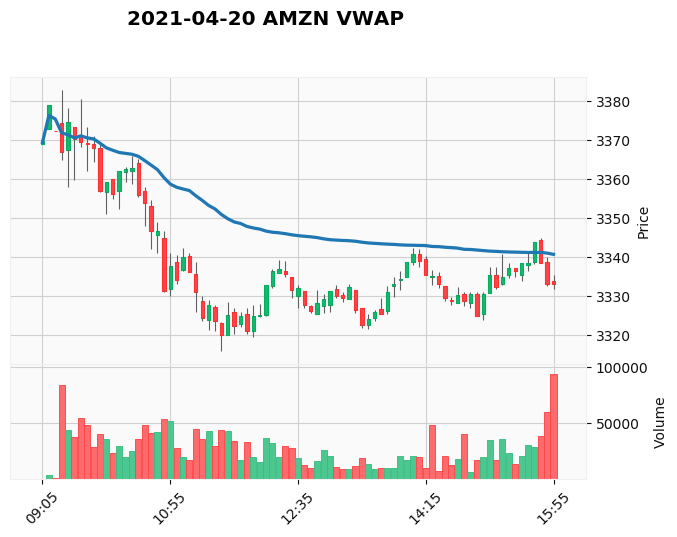

2021-04-20
Cash: 1000.0
Return: 0.00%


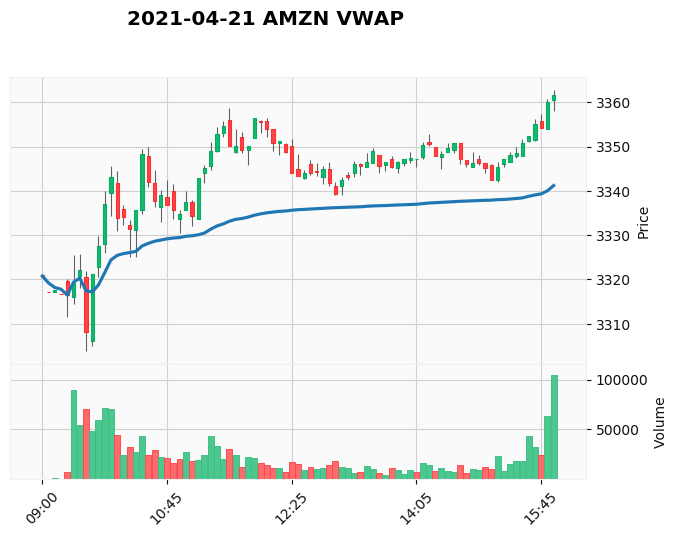

2021-04-21
09:35:00: Buy 0.301 AMZN shares at 3322.02 per share
09:40:00: Sell 0.301 AMZN shares at 3308.0 per share
09:50:00: Buy 0.299 AMZN shares at 3327.5 per share
Cash: 1006.0053085385925
Return: 0.60%


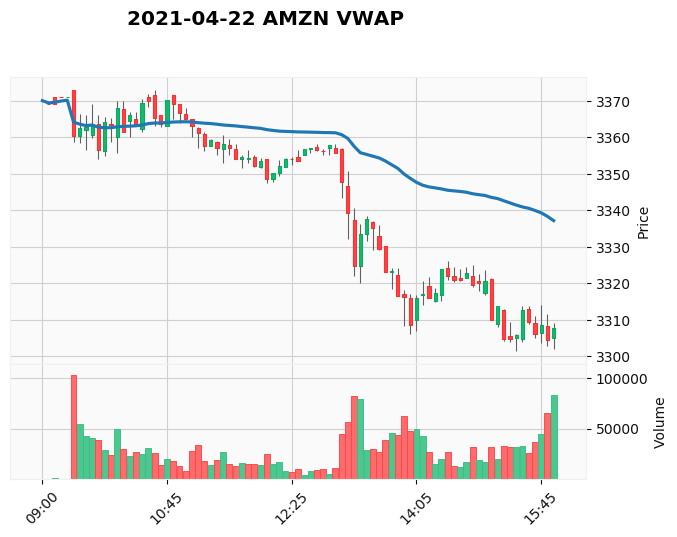

2021-04-22
09:20:00: Buy 0.297 AMZN shares at 3371.03 per share
09:30:00: Sell 0.297 AMZN shares at 3360.3001 per share
10:00:00: Buy 0.296 AMZN shares at 3363.3476 per share
10:10:00: Sell 0.296 AMZN shares at 3361.4744 per share
10:15:00: Buy 0.296 AMZN shares at 3366.035 per share
10:40:00: Sell 0.296 AMZN shares at 3363.69 per share
10:50:00: Buy 0.296 AMZN shares at 3369.08 per share
11:05:00: Sell 0.296 AMZN shares at 3363.0 per share
Cash: 993.7711443574283
Return: -0.62%


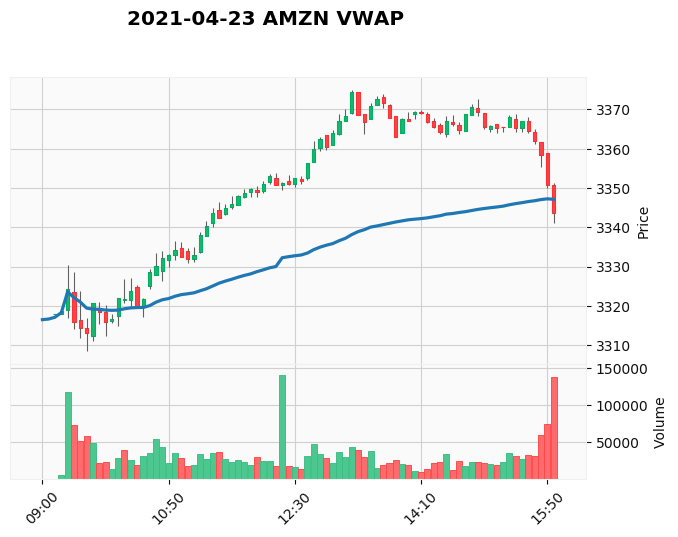

2021-04-23
09:05:00: Buy 0.301 AMZN shares at 3316.9 per share
09:35:00: Sell 0.301 AMZN shares at 3315.93 per share
10:15:00: Buy 0.301 AMZN shares at 3321.69 per share
15:55:00: Sell 0.301 AMZN shares at 3343.6425 per share
Cash: 1006.3144602226057
Return: 0.63%


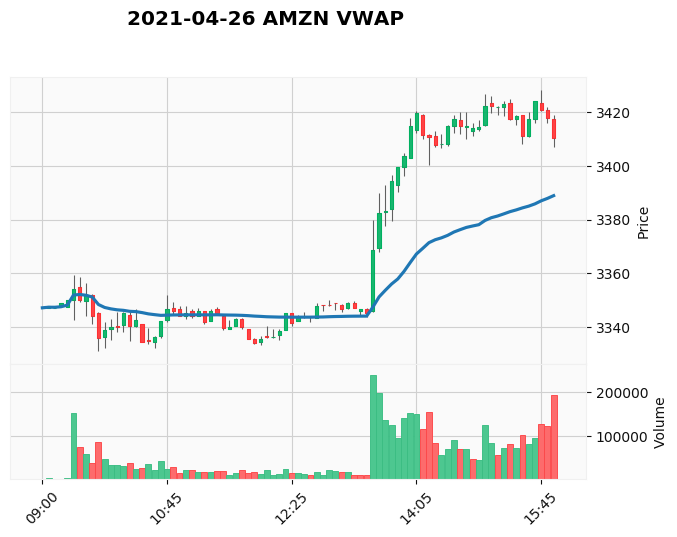

2021-04-26
09:20:00: Buy 0.299 AMZN shares at 3349.0 per share
09:35:00: Sell 0.299 AMZN shares at 3349.8355 per share
10:50:00: Buy 0.299 AMZN shares at 3345.73 per share
10:55:00: Sell 0.299 AMZN shares at 3343.85 per share
11:25:00: Buy 0.299 AMZN shares at 3345.0 per share
12:25:00: Sell 0.299 AMZN shares at 3341.58 per share
12:40:00: Buy 0.299 AMZN shares at 3343.685 per share
Cash: 1018.597205758095
Return: 1.86%


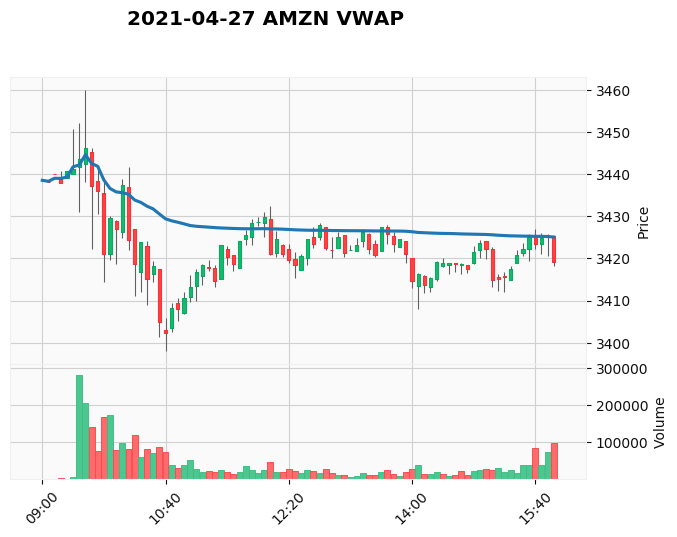

2021-04-27
09:10:00: Buy 0.291 AMZN shares at 3440.0 per share
09:15:00: Sell 0.291 AMZN shares at 3438.0001 per share
11:55:00: Buy 0.291 AMZN shares at 3428.645 per share
12:05:00: Sell 0.291 AMZN shares at 3420.9443 per share
Cash: 997.1739501585624
Return: -0.28%


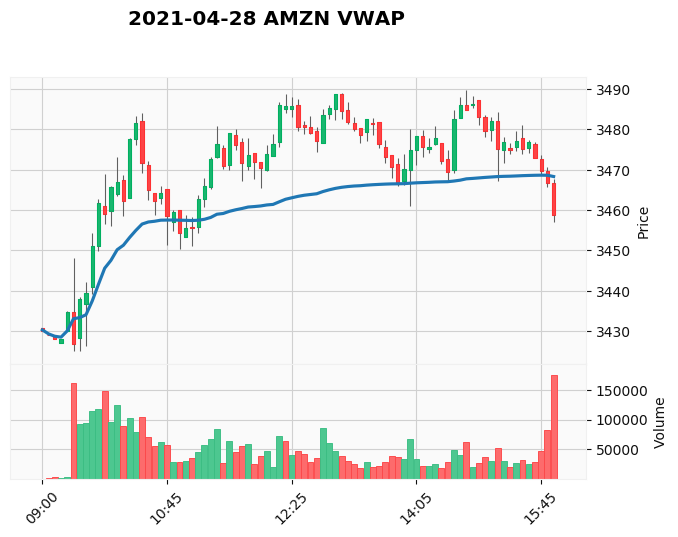

2021-04-28
09:40:00: Buy 0.291 AMZN shares at 3439.395 per share
10:55:00: Sell 0.291 AMZN shares at 3454.225 per share
11:15:00: Buy 0.290 AMZN shares at 3466.0 per share
15:50:00: Sell 0.290 AMZN shares at 3466.785 per share
Cash: 1004.5392672632738
Return: 0.45%


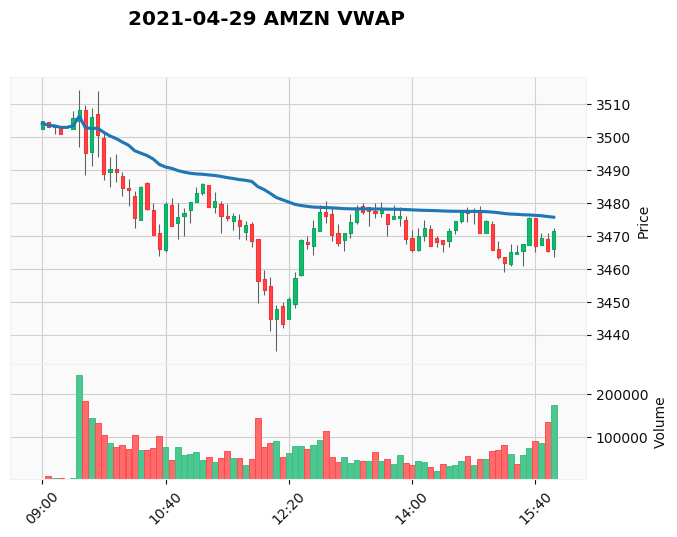

2021-04-29
14:50:00: Buy 0.288 AMZN shares at 3477.9499 per share
14:55:00: Sell 0.288 AMZN shares at 3471.04 per share
Cash: 998.0132261249652
Return: -0.20%


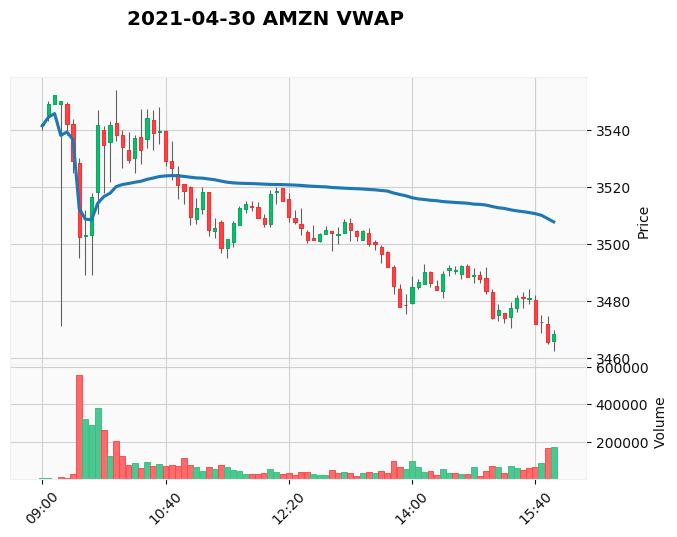

2021-04-30
09:00:00: Buy 0.282 AMZN shares at 3542.0 per share
09:25:00: Sell 0.282 AMZN shares at 3529.0 per share
09:45:00: Buy 0.281 AMZN shares at 3541.69 per share
10:50:00: Sell 0.281 AMZN shares at 3520.5187 per share
Cash: 990.3739575136938
Return: -0.96%
0.022707152012688546


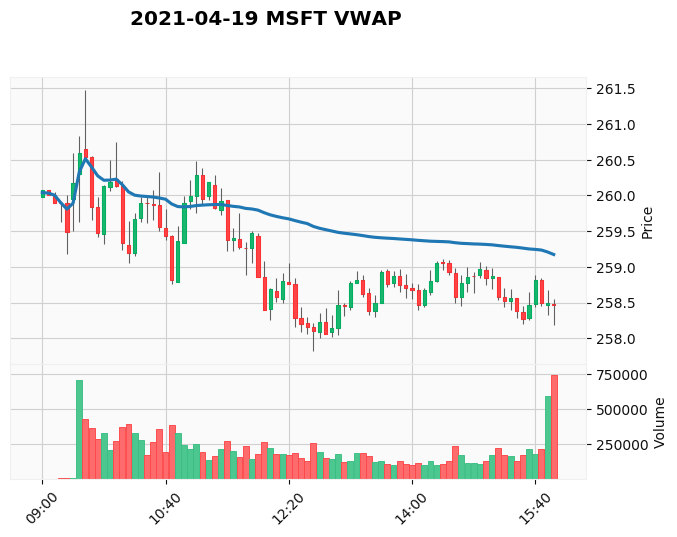

2021-04-19
09:15:00: Buy 3.848 MSFT shares at 259.9 per share
09:20:00: Sell 3.848 MSFT shares at 259.49 per share
09:25:00: Buy 3.837 MSFT shares at 260.18 per share
09:40:00: Sell 3.837 MSFT shares at 259.84 per share
11:00:00: Buy 3.835 MSFT shares at 259.99 per share
11:20:00: Sell 3.835 MSFT shares at 259.8199 per share
Cash: 996.4653738688027
Return: -0.35%


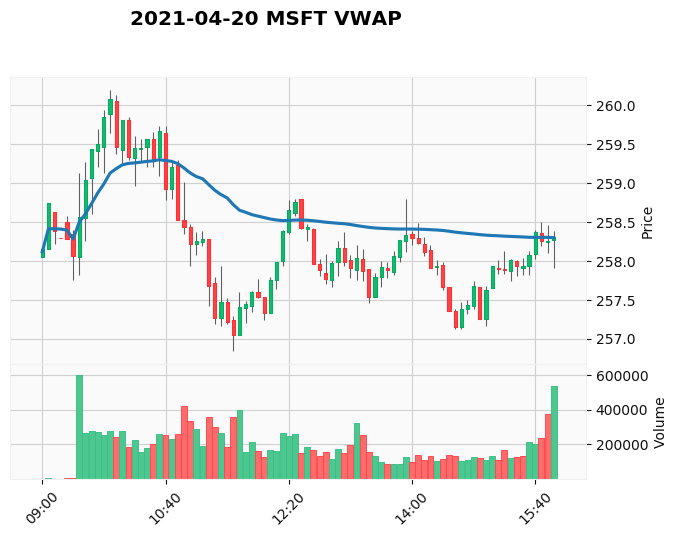

2021-04-20
09:40:00: Buy 3.854 MSFT shares at 259.44 per share
10:40:00: Sell 3.854 MSFT shares at 258.93 per share
12:25:00: Buy 3.857 MSFT shares at 258.76 per share
12:30:00: Sell 3.857 MSFT shares at 258.42 per share
Cash: 996.7228516303974
Return: -0.33%


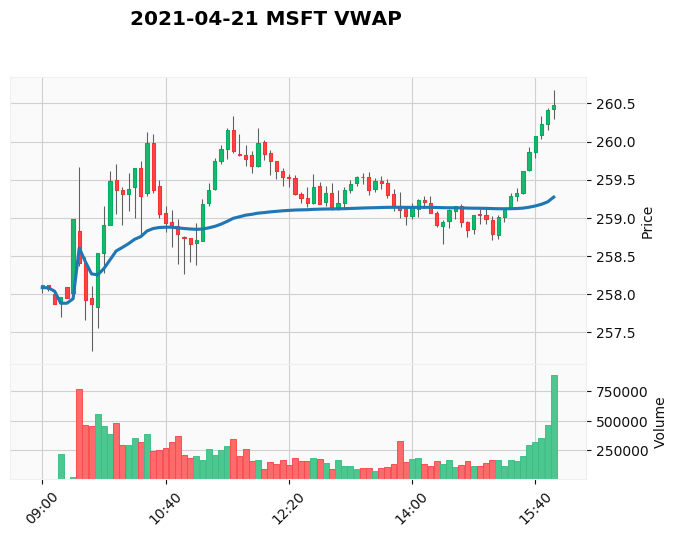

2021-04-21
09:00:00: Buy 3.874 MSFT shares at 258.12 per share
09:05:00: Sell 3.874 MSFT shares at 258.07 per share
09:15:00: Buy 3.876 MSFT shares at 257.9597 per share
09:30:00: Sell 3.876 MSFT shares at 258.4 per share
09:50:00: Buy 3.868 MSFT shares at 258.91 per share
10:50:00: Sell 3.868 MSFT shares at 258.7824 per share
11:15:00: Buy 3.859 MSFT shares at 259.3651 per share
13:50:00: Sell 3.859 MSFT shares at 259.1 per share
14:10:00: Buy 3.858 MSFT shares at 259.21 per share
14:15:00: Sell 3.858 MSFT shares at 259.06 per share
15:20:00: Buy 3.855 MSFT shares at 259.28 per share
Cash: 1004.042908472087
Return: 0.40%


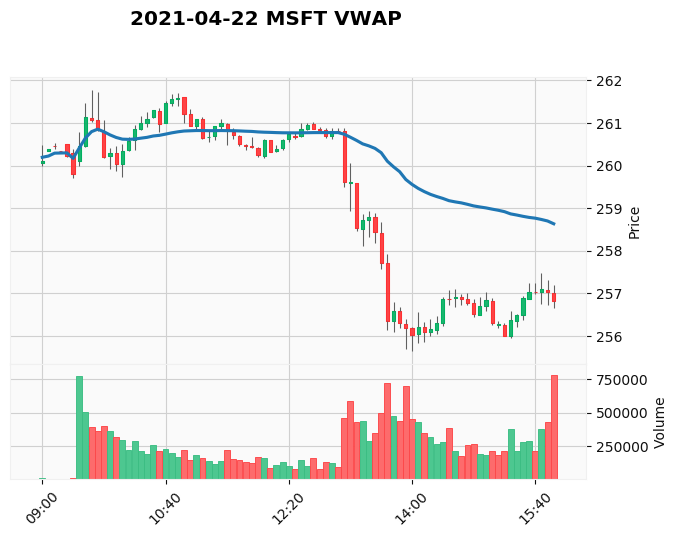

2021-04-22
09:05:00: Buy 3.840 MSFT shares at 260.39 per share
09:20:00: Sell 3.840 MSFT shares at 260.2301 per share
09:40:00: Buy 3.828 MSFT shares at 261.08 per share
09:45:00: Sell 3.828 MSFT shares at 260.83 per share
10:20:00: Buy 3.825 MSFT shares at 260.999 per share
11:10:00: Sell 3.825 MSFT shares at 260.65 per share
11:25:00: Buy 3.820 MSFT shares at 260.99 per share
11:30:00: Sell 3.820 MSFT shares at 260.8 per share
12:35:00: Buy 3.818 MSFT shares at 260.96 per share
12:50:00: Sell 3.818 MSFT shares at 260.7 per share
13:00:00: Buy 3.816 MSFT shares at 260.81 per share
13:05:00: Sell 3.816 MSFT shares at 259.61 per share
Cash: 990.7955228258509
Return: -0.92%


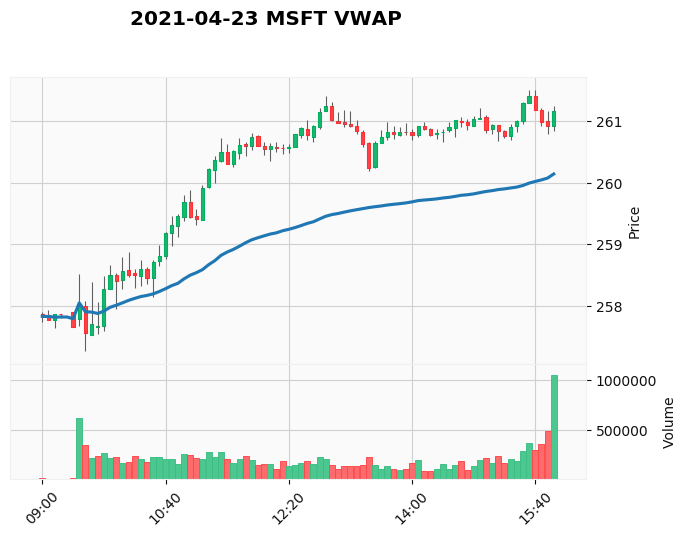

2021-04-23
09:00:00: Buy 3.878 MSFT shares at 257.85 per share
09:05:00: Sell 3.878 MSFT shares at 257.77 per share
09:15:00: Buy 3.877 MSFT shares at 257.88 per share
09:25:00: Sell 3.877 MSFT shares at 257.66 per share
09:55:00: Buy 3.864 MSFT shares at 258.51 per share
Cash: 1009.076027892668
Return: 0.91%


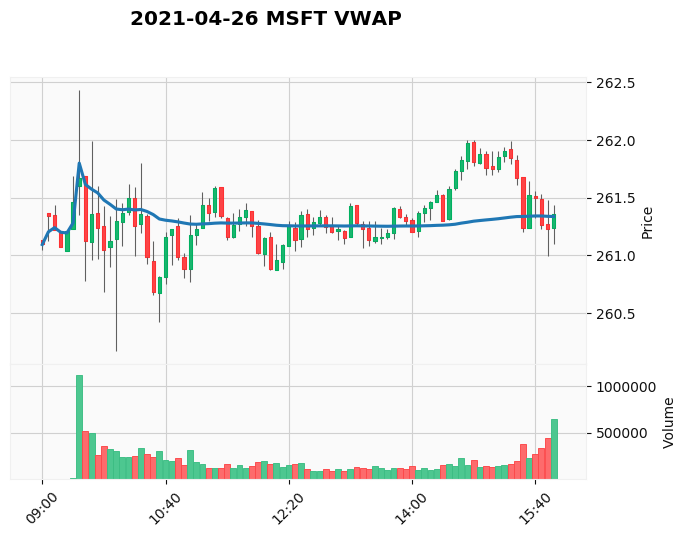

2021-04-26
09:00:00: Buy 3.830 MSFT shares at 261.1 per share
09:10:00: Sell 3.830 MSFT shares at 261.22 per share
11:15:00: Buy 3.828 MSFT shares at 261.37 per share
11:30:00: Sell 3.828 MSFT shares at 261.1626 per share
11:45:00: Buy 3.824 MSFT shares at 261.39 per share
11:50:00: Sell 3.824 MSFT shares at 261.2583 per share
12:45:00: Buy 3.823 MSFT shares at 261.33 per share
12:50:00: Sell 3.823 MSFT shares at 261.2483 per share
13:15:00: Buy 3.823 MSFT shares at 261.28 per share
13:20:00: Sell 3.823 MSFT shares at 261.23 per share
13:50:00: Buy 3.821 MSFT shares at 261.33 per share
14:00:00: Sell 3.821 MSFT shares at 261.2 per share
14:10:00: Buy 3.818 MSFT shares at 261.41 per share
15:30:00: Sell 3.818 MSFT shares at 261.2399 per share
15:40:00: Buy 3.815 MSFT shares at 261.5 per share
15:45:00: Sell 3.815 MSFT shares at 261.26 per share
Cash: 996.5967341933202
Return: -0.34%


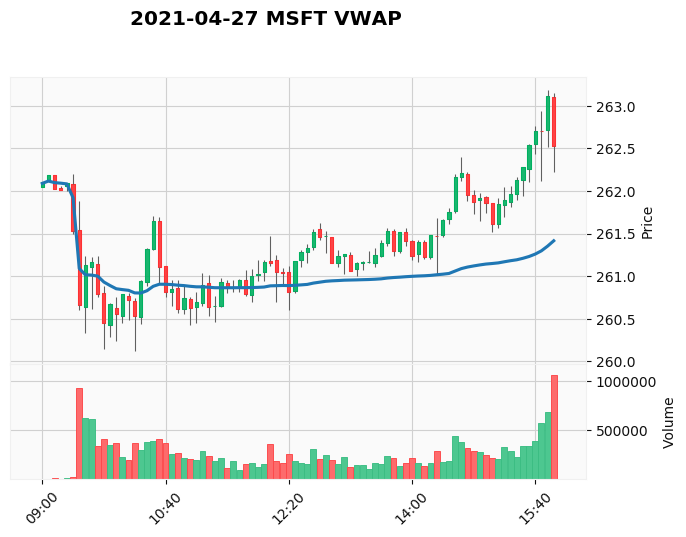

2021-04-27
09:05:00: Buy 3.814 MSFT shares at 262.19 per share
09:10:00: Sell 3.814 MSFT shares at 262.03 per share
09:40:00: Buy 3.827 MSFT shares at 261.17 per share
09:45:00: Sell 3.827 MSFT shares at 260.785 per share
10:25:00: Buy 3.819 MSFT shares at 261.325 per share
10:40:00: Sell 3.819 MSFT shares at 260.81 per share
11:40:00: Buy 3.816 MSFT shares at 260.96 per share
11:45:00: Sell 3.816 MSFT shares at 260.79 per share
11:55:00: Buy 3.813 MSFT shares at 261.03 per share
12:20:00: Sell 3.813 MSFT shares at 260.815 per share
12:30:00: Buy 3.806 MSFT shares at 261.29 per share
Cash: 999.2008019898237
Return: -0.08%


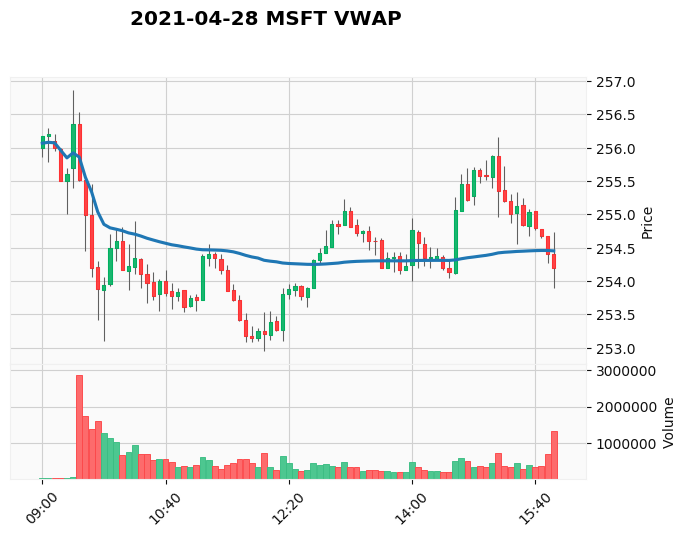

2021-04-28
09:05:00: Buy 3.903 MSFT shares at 256.2 per share
09:10:00: Sell 3.903 MSFT shares at 256.0 per share
12:45:00: Buy 3.927 MSFT shares at 254.42 per share
13:35:00: Sell 3.927 MSFT shares at 254.1935 per share
13:45:00: Buy 3.925 MSFT shares at 254.3639 per share
13:50:00: Sell 3.925 MSFT shares at 254.17 per share
14:05:00: Buy 3.919 MSFT shares at 254.575 per share
14:25:00: Sell 3.919 MSFT shares at 254.1899 per share
14:40:00: Buy 3.899 MSFT shares at 255.46 per share
15:50:00: Sell 3.899 MSFT shares at 254.41 per share
Cash: 991.9656974979995
Return: -0.80%


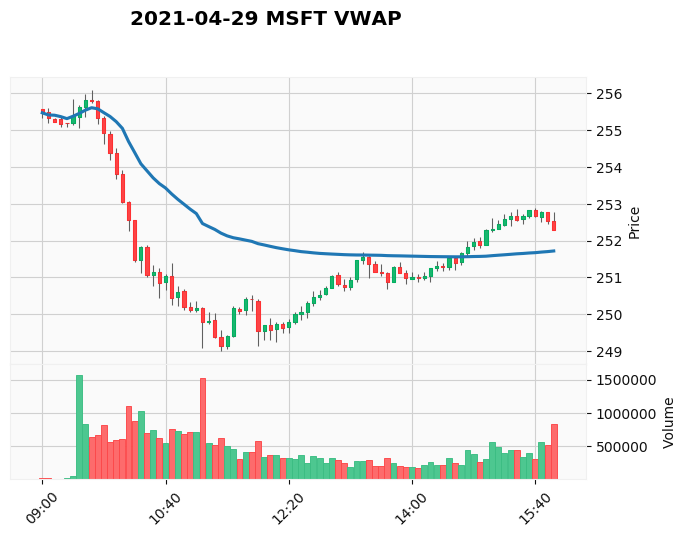

2021-04-29
09:00:00: Buy 3.914 MSFT shares at 255.5 per share
09:05:00: Sell 3.914 MSFT shares at 255.33 per share
09:35:00: Buy 3.906 MSFT shares at 255.83 per share
09:45:00: Sell 3.906 MSFT shares at 255.34 per share
14:45:00: Buy 3.961 MSFT shares at 251.84 per share
Cash: 999.2424230374392
Return: -0.08%


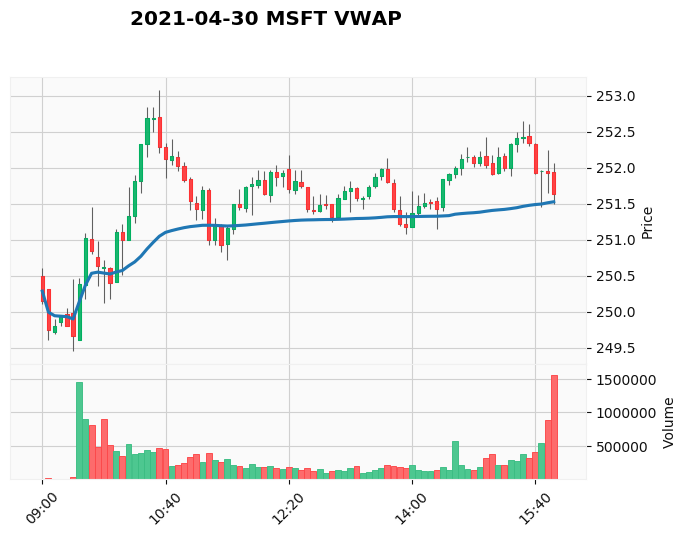

2021-04-30
09:35:00: Buy 3.984 MSFT shares at 251.02 per share
09:55:00: Sell 3.984 MSFT shares at 250.4 per share
10:05:00: Buy 3.974 MSFT shares at 250.99 per share
11:15:00: Sell 3.974 MSFT shares at 250.99 per share
11:40:00: Buy 3.967 MSFT shares at 251.45 per share
13:50:00: Sell 3.967 MSFT shares at 251.21 per share
14:05:00: Buy 3.963 MSFT shares at 251.47 per share
Cash: 997.2120521310586
Return: -0.28%
-0.018679606460552917


In [6]:
stocks = ['TSLA','AAPL','GME','AMZN','MSFT']
for stock in stocks:
    VWAPWAP(stock,1000)